In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("new_oecd.csv")
df_Brazil = df[df["country"] == "Brazil"]
df_Brazil.dropna()
df_Brazil['month'] = pd.to_datetime(df_Brazil['month'])
df_Brazil = df_Brazil.round(5)
df_Brazil_FDI = df_Brazil[['month', 'fdi_inf', 'fdi_out']]
df_Brazil_FDI = df_Brazil_FDI.set_index('month')
df_Brazil

C:\Users\Carlos H\AppData\Local\Temp\ipykernel_3976\1131333516.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Brazil['month'] = pd.to_datetime(df_Brazil['month'])


country      month  debt_inf  debt_out   eq_inf   eq_out  fdi_inf  \
364  Brazil 1995-01-01   0.35669  -0.03967 -1.24738  0.05046  0.41242   
365  Brazil 1995-02-01   0.04840   0.04337 -0.07639  0.02728  0.13114   
366  Brazil 1995-03-01  -1.15643   0.09645 -1.26827  0.11512 -0.02415   
367  Brazil 1995-04-01   0.01780   0.24758  0.17463  0.00238  0.16793   
368  Brazil 1995-05-01   0.26304  -0.08419  1.10164  0.07501  0.48183   
..      ...        ...       ...       ...      ...      ...      ...   
723  Brazil 2024-12-01   0.17414  -1.20971 -8.07022 -0.07458  2.76484   
724  Brazil 2025-01-01  -6.47339   0.02871  1.65202 -0.12912  6.50142   
725  Brazil 2025-02-01   2.08337   0.71937  1.03261  1.19019  9.30019   
726  Brazil 2025-03-01  -0.15515   0.23746 -0.93876  0.66048  5.98969   
727  Brazil 2025-04-01   2.22738   0.65703 -1.43669  0.61722  5.49099   

     fdi_out  other_inf  other_out  port_inf  port_out  
364  0.07938    0.80924   -0.64628  -0.89070   0.01080  
365  0.03520    2.16634    0.80849  -0.02799   0.07065  
366  0.06469    0.63707   -0.05849  -2.42469   0.21157  
367  0.00361    0.24276   -0.08265   0.19243   0.24996  
368  0.18195    1.45445    0.28160   1.36468  -0.00918  
..       ...        ...        ...       ...       ...  
723  3.12255  -18.01831   -9.25044  -7.89608  -1.28430  
724  4.20844    0.24513   -9.99446  -4.82137  -0.10042  
725  3.85677    3.40256   -1.62067   3.11597   1.90956  
726  3.14423    0.00553   -3.86464  -1.09390   0.89795  
727  1.20766    3.68248    3.41289   0.79068   1.27425  

[364 rows x 12 columns]

In [34]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

outliers_fraction = float(.01)
scaler = StandardScaler()
np_scaled = scaler.fit_transform(df_Brazil['fdi_out'].values.reshape(-1, 1))
data = pd.DataFrame(np_scaled)
# train isolation forest
model =  IsolationForest(contamination=outliers_fraction)
model.fit(data)
df_Brazil_FDI['anomaly'] = model.predict(data)

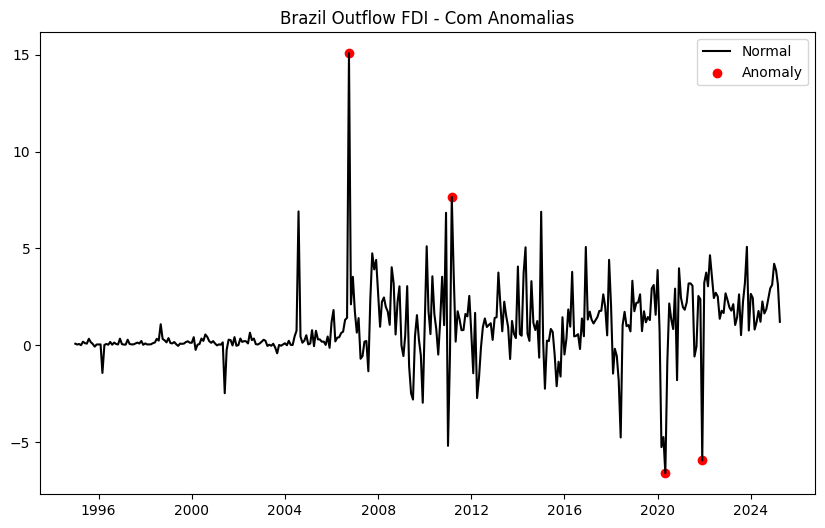

In [39]:
fig, ax = plt.subplots(figsize=(10,6))
a = df_Brazil_FDI.loc[df_Brazil_FDI['anomaly'] == -1, ['fdi_out']] #anomaly
ax.plot(df_Brazil_FDI.index, df_Brazil_FDI['fdi_out'], color='black', label = 'Normal')
ax.scatter(a.index,a['fdi_out'], color='red', label = 'Anomaly')
plt.legend()
plt.title("Brazil Outflow FDI - Com Anomalias")
plt.show()
